# Jasmine's 2025 Boba Tracker

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import calplot

In [102]:
boba_raw = pd.read_csv('data/boba2025.csv')

In [103]:
boba_raw

,month,day,store,drink,toppings,drink name,friends,cost,size,rating
0,january,1,cafe bakery & restaurant,hong kong milk tea,NaN,NaN,"sophia, mom, dad, waipo",$4.75,16oz,8/10
1,january,2,1011 sip tea,lychee black milk tea,boba,NaN,"sophia, waipo",$5.50,16oz,7/10
2,january,3,mr sun tea,earl grey milk tea,"boba, pudding, grass jelly",three brothers milk tea,emily,$4.00,22oz,8.5/10
3,january,5,mandro teahouse,jasmine green milk tea,pudding,NaN,"emily, jas",$5.00,22oz,8.5/10
4,january,7,teaspoon,jasmine green milk tea,boba,creamy jasmine,jeff,$6.75,22oz,9/10
...,...,...,...,...,...,...,...,...,...,...
263,october,18,heytea,mango coconut smoothie,"sago, coconut pudding, mango puree",coconut mango boom,"wenchi, valeria",$6.99,16oz,10/10
264,october,19,heytea,mango smoothie,cheese foam,cloud mango,wenchi,$7.49,16oz,10/10
265,october,19,la la bakeshop,vietnamese coffee,pandan cream cloud,pandan cream coffee,wenchi,$7.25,12oz,9/10
266,october,19,molly tea,tong mu lapsang black milk tea,"boba, hazelnut cheese foam, cocoa powder",tongmu lapsang bubble tea,wenchi,$7.49,16oz,8.5/10


In [104]:
boba = boba_raw.copy()

In [105]:
def get_toppings(toppings):
    if pd.isnull(toppings):
        return ['no topping']
    toppings = toppings.strip()
    return toppings.split(', ')

def get_friends(friends):
    if pd.isnull(friends):
        return ['by myself']
    friends = friends.strip()
    return friends.split(', ')

def get_category(drink):
    if 'milk tea' in drink:
        return 'milk tea'
    elif 'matcha' in drink:
        return 'matcha'
    elif 'hojicha' in drink:
        return 'hojicha'
    elif 'milk' in drink:
        return 'milk'
    elif 'tea' in drink:
        return 'tea'
    elif 'smoothie' in drink or 'slush' in drink or 'blended' in drink:
        return 'blended'
    else:
        return 'other'

boba['toppings'] = boba['toppings'].apply(get_toppings)
boba['friends'] = boba['friends'].apply(get_friends)
boba['type'] = boba['drink'].apply(get_category)

In [106]:
month_map = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12
}

boba['month_num'] = boba['month'].map(month_map).astype(int)
boba['date'] = boba['day'].astype(int)
boba['date_obj'] = boba.apply(lambda row: datetime(year=2025, month=row['month_num'], day=row['date']), axis=1)
boba['weekday'] = boba['date_obj'].apply(lambda d: d.weekday() + 1)

In [107]:
weekday_map = {
    1: "monday",
    2: "tuesday",
    3: "wednesday",
    4: "thursday",
    5: "friday",
    6: "saturday",
    7: "sunday"
}

boba['day of week'] = boba['weekday'].map(weekday_map)

In [130]:
boba['cost_dollars'] = boba['cost'].str.strip('$').astype(float)
boba['size_oz'] = boba['size'].str.strip('oz').astype(int)
boba['rating_over_10'] = boba['rating'].str.split('/').str[0].astype(float)

In [131]:
boba

,month,day,store,drink,toppings,drink name,friends,cost,size,rating,type,month_num,date,date_obj,weekday,day of week,cost_dollars,size_oz,rating_over_10
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",$4.75,16oz,8/10,milk tea,1,1,2025-01-01,3,wednesday,4.75,16,8.0
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",$5.50,16oz,7/10,milk tea,1,2,2025-01-02,4,thursday,5.50,16,7.0
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],$4.00,22oz,8.5/10,milk tea,1,3,2025-01-03,5,friday,4.00,22,8.5
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",$5.00,22oz,8.5/10,milk tea,1,5,2025-01-05,7,sunday,5.00,22,8.5
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],$6.75,22oz,9/10,milk tea,1,7,2025-01-07,2,tuesday,6.75,22,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,october,18,heytea,mango coconut smoothie,"[sago, coconut pudding, mango puree]",coconut mango boom,"[wenchi, valeria]",$6.99,16oz,10/10,blended,10,18,2025-10-18,6,saturday,6.99,16,10.0
264,october,19,heytea,mango smoothie,[cheese foam],cloud mango,[wenchi],$7.49,16oz,10/10,blended,10,19,2025-10-19,7,sunday,7.49,16,10.0
265,october,19,la la bakeshop,vietnamese coffee,[pandan cream cloud],pandan cream coffee,[wenchi],$7.25,12oz,9/10,other,10,19,2025-10-19,7,sunday,7.25,12,9.0
266,october,19,molly tea,tong mu lapsang black milk tea,"[boba, hazelnut cheese foam, cocoa powder]",tongmu lapsang bubble tea,[wenchi],$7.49,16oz,8.5/10,milk tea,10,19,2025-10-19,7,sunday,7.49,16,8.5


In [132]:
boba_clean = boba.drop(columns=['month_num', 'date', 'weekday', 'cost', 'size', 'rating'])
boba_clean

,month,day,store,drink,toppings,drink name,friends,type,date_obj,day of week,cost_dollars,size_oz,rating_over_10
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",milk tea,2025-01-01,wednesday,4.75,16,8.0
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",milk tea,2025-01-02,thursday,5.50,16,7.0
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],milk tea,2025-01-03,friday,4.00,22,8.5
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",milk tea,2025-01-05,sunday,5.00,22,8.5
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],milk tea,2025-01-07,tuesday,6.75,22,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,october,18,heytea,mango coconut smoothie,"[sago, coconut pudding, mango puree]",coconut mango boom,"[wenchi, valeria]",blended,2025-10-18,saturday,6.99,16,10.0
264,october,19,heytea,mango smoothie,[cheese foam],cloud mango,[wenchi],blended,2025-10-19,sunday,7.49,16,10.0
265,october,19,la la bakeshop,vietnamese coffee,[pandan cream cloud],pandan cream coffee,[wenchi],other,2025-10-19,sunday,7.25,12,9.0
266,october,19,molly tea,tong mu lapsang black milk tea,"[boba, hazelnut cheese foam, cocoa powder]",tongmu lapsang bubble tea,[wenchi],milk tea,2025-10-19,sunday,7.49,16,8.5


### stores

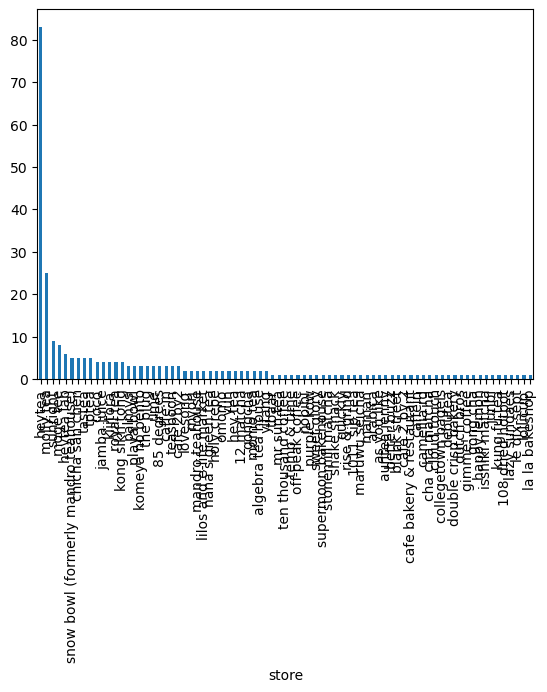

In [110]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False).plot.bar();

In [111]:
num_stores = boba_clean.groupby('store').count()['drink'].shape[0]
print(f'I have been to {num_stores} different stores in 2025 (not counting different locations of the same chain!)')

I have been to 79 different stores in 2025 (not counting different locations of the same chain!)


top 30 stores

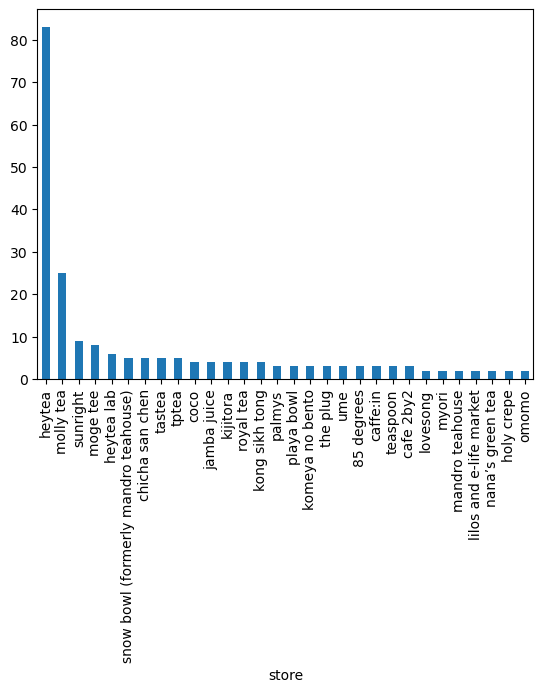

In [112]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False)[:30].plot.bar();

### day of the week

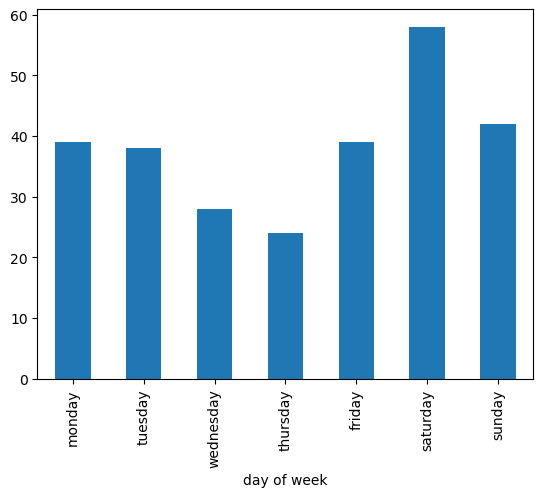

In [113]:
weekday_order = weekday_map.values()
boba_clean.groupby('day of week').count()['drink'].reindex(weekday_order).plot.bar();

In [114]:
week_frequencies = boba_clean.groupby('day of week').count().sort_values(
    by='drink', ascending=False)['drink']
popular_day = week_frequencies.index[0]
popular_day_count = week_frequencies[0]
print(f'I get boba most often on {popular_day}s, having gotten {popular_day_count} drinks on this day of the week in 2025.')

I get boba most often on saturdays, having gotten 58 drinks on this day of the week in 2025.


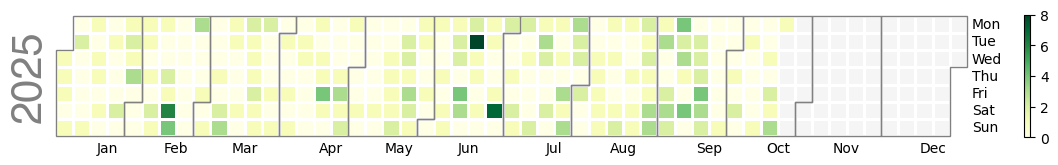

In [115]:
calplot.calplot(boba_clean.groupby('date_obj').count()['drink'], cmap='YlGn');

### unique drinks

In [116]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)

drink
mango coconut smoothie    36
mango smoothie            19
jasmine milk tea          17
matcha latte              11
milk tea                   9
                          ..
iced peach oolong tea      1
honey lavender latte       1
hojicha smoothie           1
hojicha milk tea           1
yuzu black tea slushie     1
Name: day, Length: 106, dtype: int64

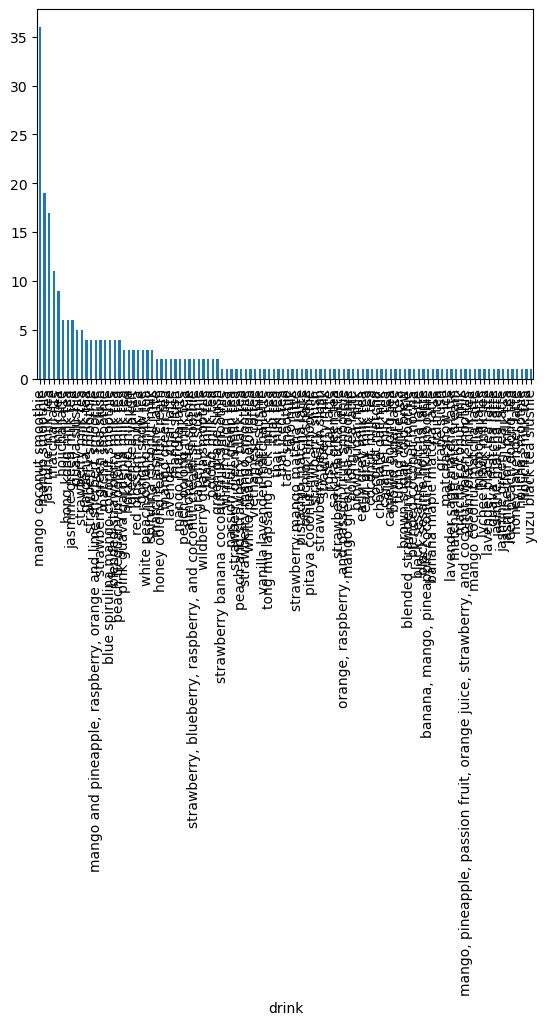

In [117]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False).plot.bar();

top 10 unique drinks

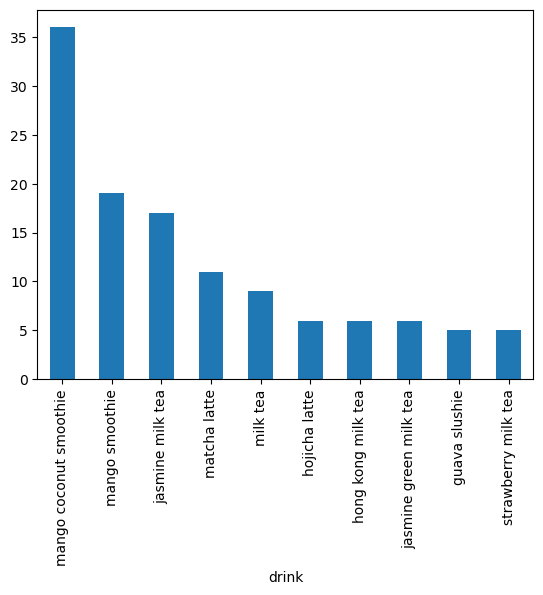

In [118]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)[:10].plot.bar();

### toppings

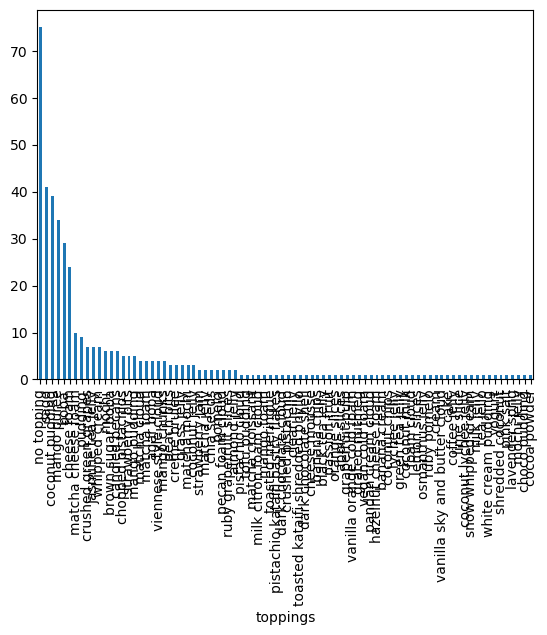

In [119]:
boba_clean['toppings'].dropna().explode().value_counts().plot.bar();

top 10 toppings

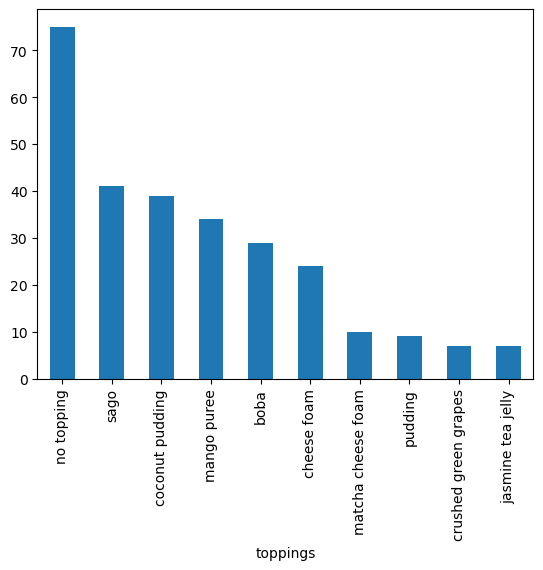

In [120]:
boba_clean['toppings'].dropna().explode().value_counts()[:10].plot.bar();

top 10 toppings + counts

In [121]:
boba_clean['toppings'].dropna().explode().value_counts()[:10]

toppings
no topping              75
sago                    41
coconut pudding         39
mango puree             34
boba                    29
cheese foam             24
matcha cheese foam      10
pudding                  9
crushed green grapes     7
jasmine tea jelly        7
Name: count, dtype: int64

toppings by group (when i get them together in a drink)

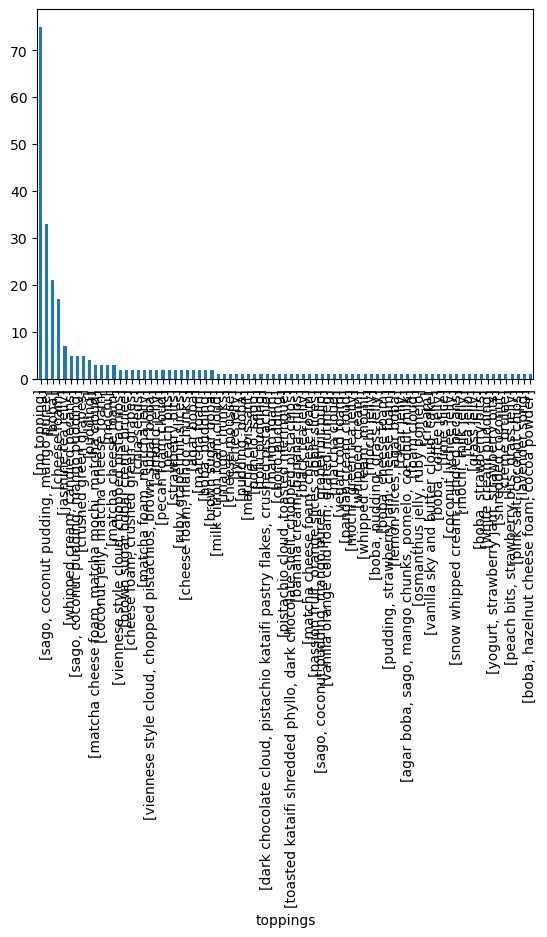

In [122]:
boba_clean['toppings'].dropna().value_counts().plot.bar();

top 10 toppings by group (when i get them together in a drink)

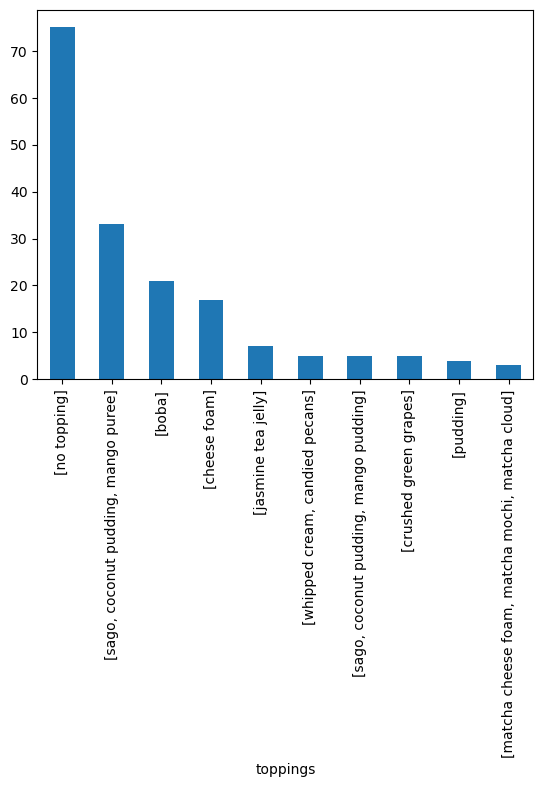

In [123]:
boba_clean['toppings'].dropna().value_counts()[:10].plot.bar();

### friends

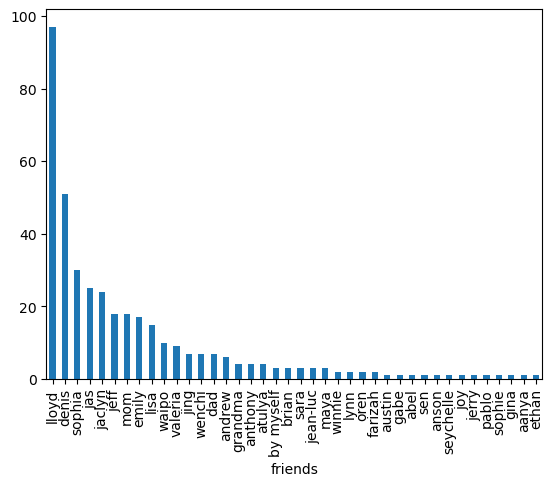

In [124]:
boba_clean['friends'].dropna().explode().value_counts().plot.bar();

top 20 friends + counts

In [125]:
boba_clean['friends'].dropna().explode().value_counts()[:20]

friends
lloyd        97
denis        51
sophia       30
jas          25
jaclyn       24
jeff         18
mom          18
emily        17
lisa         15
waipo        10
valeria       9
jing          7
wenchi        7
dad           7
andrew        6
grandma       4
anthony       4
atulya        4
by myself     3
brian         3
Name: count, dtype: int64

friends that went to get boba together as a group

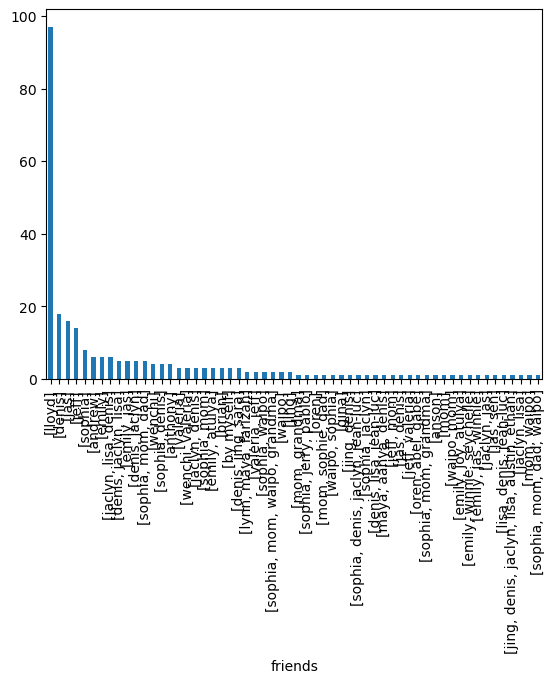

In [126]:
boba_clean['friends'].dropna().value_counts().plot.bar();

### cost

average cost

In [181]:
avg_cost = boba_clean['cost_dollars'].mean()
print(f'In 2025, I spent on average ${avg_cost:.2f} per drink.')

In 2025, I spent on average $7.25 per drink.


total cost

In [182]:
total_cost = boba_clean['cost_dollars'].sum()
print(f'In 2025, I spent ${total_cost:.2f} total on boba, pre-tax.')

In 2025, I spent $1943.86 total on boba, pre-tax.


average cost per location

In [184]:
boba_clean[['store', 'cost_dollars']].groupby('store').mean() \
[['cost_dollars']].sort_values(by='cost_dollars', ascending=False)

,cost_dollars
store,
isshiki matcha,11.500000
palmys,10.666667
playa bowl,10.283333
shake shack,9.990000
jamba juice,9.965000
...,...
quickly,4.750000
cafe bakery & restaurant,4.750000
mr sun tea,4.000000


average cost per location of places i frequent (> 5 visits)

In [185]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'cost_dollars']].groupby('store').mean().where(over5_visits) \
.dropna()[['cost_dollars']].sort_values(by='cost_dollars', ascending=False)

,cost_dollars
store,
heytea lab,8.833333
moge tee,7.412500
heytea,7.366386
sunright,6.988889
molly tea,6.962000


### size

average size

In [186]:
avg_size = boba_clean['size_oz'].mean()
print(f'In 2025, my average drink was {avg_size:.2f}oz.')

In 2025, my average drink was 18.28oz.


total ounces i drank

In [187]:
total_size = boba_clean['size_oz'].sum()
print(f'In 2025, I drank {total_size:.2f}oz of boba.')

In 2025, I drank 4900.00oz of boba.


average size per location

In [188]:
boba_clean[['store', 'size_oz']].groupby('store').mean()[['size_oz']] \
.sort_values(by='size_oz', ascending=False)

,size_oz
store,
tastea,32.0
dutch bros,32.0
jamba juice,28.0
caffe:in,26.0
yun,24.0
...,...
gimme! coffee,12.0
palmys,12.0
off-peak coffee,12.0


average size per location of places i frequent (> 5 visits)

In [189]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'size_oz']].groupby('store').mean().where(over5_visits) \
.dropna()[['size_oz']].sort_values(by='size_oz', ascending=False)

,size_oz
store,
sunright,24.000000
moge tee,22.000000
heytea,16.795181
heytea lab,16.000000
molly tea,16.000000


### rating

average rating

In [190]:
avg_rating = boba_clean['rating_over_10'].mean()
print(f'In 2025, my average drink rating was {avg_rating:.2f}/10.')

In 2025, my average drink rating was 8.99/10.


counts of each rating

In [191]:
boba_clean.groupby('rating_over_10').count()[['drink']].rename(
    columns={'drink': 'count'})

,count
rating_over_10,
3.0,1
4.0,1
5.5,1
6.0,4
6.5,6
7.0,10
7.5,13
8.0,25
8.5,35


average rating per location

In [192]:
boba_clean[['store', 'rating_over_10']].groupby('store').mean()[['rating_over_10']] \
.sort_values(by='rating_over_10', ascending=False)

,rating_over_10
store,
happy lemon,10.0
hey tea,10.0
yifang,10.0
gimme! coffee,10.0
dutch bros,10.0
...,...
le dix-sept,6.5
myori,6.5
double crisp bakery,6.0


average size per location of places i frequent (> 5 visits)

In [193]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'rating_over_10']].groupby('store').mean().where(over5_visits) \
.dropna()[['rating_over_10']].sort_values(by='rating_over_10', ascending=False)

,rating_over_10
store,
molly tea,9.880000
sunright,9.555556
heytea,9.379518
moge tee,9.125000
heytea lab,8.333333


### combining cost, size, and rating

In [202]:
store_metrics_old = boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10']] \
.groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10']].sort_values(
    by='rating_over_10', ascending=False)
store_metrics_old

,cost_dollars,size_oz,rating_over_10
store,,,
happy lemon,7.250,24.0,10.0
hey tea,3.995,16.0,10.0
yifang,6.875,20.0,10.0
gimme! coffee,5.950,12.0,10.0
dutch bros,7.490,32.0,10.0
...,...,...,...
le dix-sept,7.000,16.0,6.5
myori,6.990,22.0,6.5
double crisp bakery,2.500,12.0,6.0


In [204]:
store_metrics_old['cost_per_oz'] = (
    store_metrics_old['cost_dollars'] / store_metrics_old['size_oz']
)
store_metrics_old

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
happy lemon,7.250,24.0,10.0,0.302083
hey tea,3.995,16.0,10.0,0.249688
yifang,6.875,20.0,10.0,0.343750
gimme! coffee,5.950,12.0,10.0,0.495833
dutch bros,7.490,32.0,10.0,0.234063
...,...,...,...,...
le dix-sept,7.000,16.0,6.5,0.437500
myori,6.990,22.0,6.5,0.317727
double crisp bakery,2.500,12.0,6.0,0.208333


average cost per ounce of drink by location

In [195]:
boba_clean['cost_per_oz'] = boba_clean['cost_dollars'] / boba_clean['size_oz']

In [201]:
(
    boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .sort_values(
    by='rating_over_10', ascending=False)
)

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
happy lemon,7.250,24.0,10.0,0.302083
hey tea,3.995,16.0,10.0,0.249688
yifang,6.875,20.0,10.0,0.343750
gimme! coffee,5.950,12.0,10.0,0.495833
dutch bros,7.490,32.0,10.0,0.234063
...,...,...,...,...
le dix-sept,7.000,16.0,6.5,0.437500
myori,6.990,22.0,6.5,0.317727
double crisp bakery,2.500,12.0,6.0,0.208333


In [200]:
store_metrics = (
    boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .sort_values(
    by='cost_per_oz', ascending=False)
)
store_metrics

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
isshiki matcha,11.500000,12.0,7.500000,0.958333
palmys,10.666667,12.0,9.833333,0.888889
cloud touch,5.690000,8.0,9.000000,0.711250
supermoon bakehouse,8.500000,12.0,8.000000,0.708333
stonemill matcha,8.000000,12.0,8.500000,0.666667
...,...,...,...,...
mandro teahouse,5.250000,22.0,7.500000,0.238636
dutch bros,7.490000,32.0,10.000000,0.234063
snow bowl (formerly mandro teahouse),5.100000,22.0,8.500000,0.231818


In [210]:
store_metrics.where(over5_visits).dropna().sort_values(by='rating_over_10', 
                                                       ascending=False)

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
molly tea,6.962000,16.000000,9.880000,0.435125
sunright,6.988889,24.000000,9.555556,0.291204
heytea,7.366386,16.795181,9.379518,0.442452
moge tee,7.412500,22.000000,9.125000,0.336932
heytea lab,8.833333,16.000000,8.333333,0.552083
